In [1]:
import numpy as np
import pandas as pd
img=pd.read_csv('C://Users//Pratik//Desktop//digits.txt',sep=',',header=None)
k=10
img=img.loc[:,img.sum()!=0] #remove columns with all 0
img=img.T.reset_index().drop(columns=['index']).T #reset header

In [2]:
img.describe()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,667
count,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,0.0038,0.0236,0.0158,0.040300,0.051100,0.104700,0.234300,0.308800,0.26600,0.308100,...,0.3123,0.453400,0.558300,0.574600,0.458200,0.274100,0.179300,0.163600,0.052600,0.0006
std,0.3800,2.3600,1.5800,2.884113,2.699336,4.516213,6.495508,7.865522,6.99538,7.897481,...,7.6112,9.274601,10.181816,10.410152,9.750024,7.050811,5.674149,5.736072,2.420004,0.0600
min,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
max,38.0000,236.0000,158.0000,233.000000,198.000000,255.000000,253.000000,255.000000,255.00000,255.000000,...,253.0000,255.000000,255.000000,255.000000,255.000000,254.000000,253.000000,253.000000,156.000000,6.0000


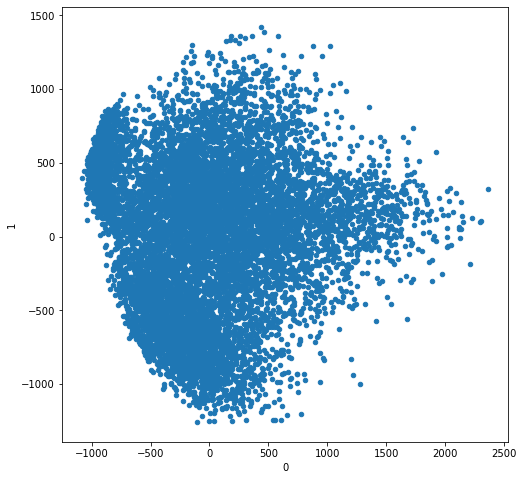

In [3]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2).fit_transform(img) #project on 2 dimensions 
vis=pd.DataFrame(data=pc) 
import seaborn as sns
import matplotlib.pyplot as plt
fig=vis.plot(kind='scatter',figsize=(8,8), x=0, y=1)

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200) #reduce dimensions to 200
pcomp=pca.fit_transform(img)
df=pd.DataFrame(data=pcomp)

In [5]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(img) #standardize dara
from sklearn.manifold import TSNE
model=TSNE(n_components=2) #t-SNE
data=pd.DataFrame(model.fit_transform(img))

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
from random import randint
cen=pd.DataFrame([data.iloc[randint(0,len(data)-1)]]) #initialize 1st centroid to random point
partition=euclidean_distances(data,data).max()/4.5
while len(cen)<k:
    flag=True
    for i in data.values:
        if ((euclidean_distances(pd.DataFrame(i).T,cen))[0]>partition).all(): #euclidean distance
            cen=cen.append(pd.DataFrame(i).T) #find other k-1 centroids
            flag=False
            break
    if flag: cen=pd.DataFrame([data.iloc[randint(0,len(data)-1)]]) #restart if unable to find other k-1 centroids to fit

<AxesSubplot:xlabel='0', ylabel='1'>

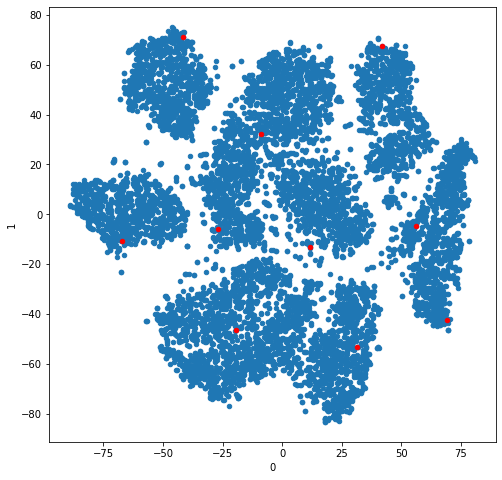

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=data.plot(kind='scatter',figsize=(8,8), x=0, y=1)
cen.plot(kind='scatter',x=0,y=1,color='r',ax=fig)

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
oasgn=None
asgn=np.zeros(len(img))
while not((asgn==oasgn).all()):
    oasgn=asgn
    fin=pd.DataFrame(euclidean_distances(data,cen))
    asgn=fin.idxmin(axis=1) #assign to centroids
    cen=pd.DataFrame([data.iloc[asgn.index[asgn==x].tolist()].mean() for x in range(k)]) #recalculate centroids

In [9]:
sse=fin.min(axis=1).sum()
print(sse)

147012.89


<AxesSubplot:xlabel='0', ylabel='1'>

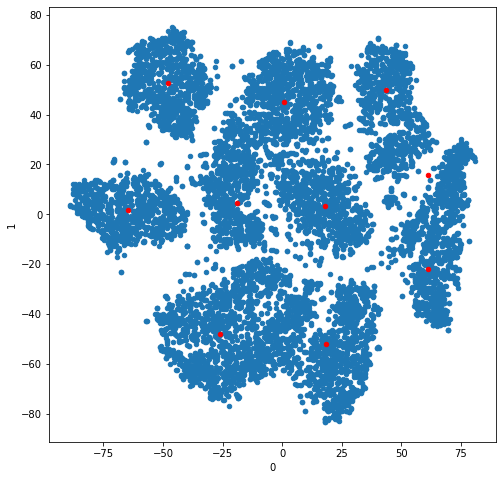

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=data.plot(kind='scatter',figsize=(8,8), x=0, y=1)
cen.plot(kind='scatter',x=0,y=1,color='r',ax=fig)

<AxesSubplot:xlabel='0', ylabel='1'>

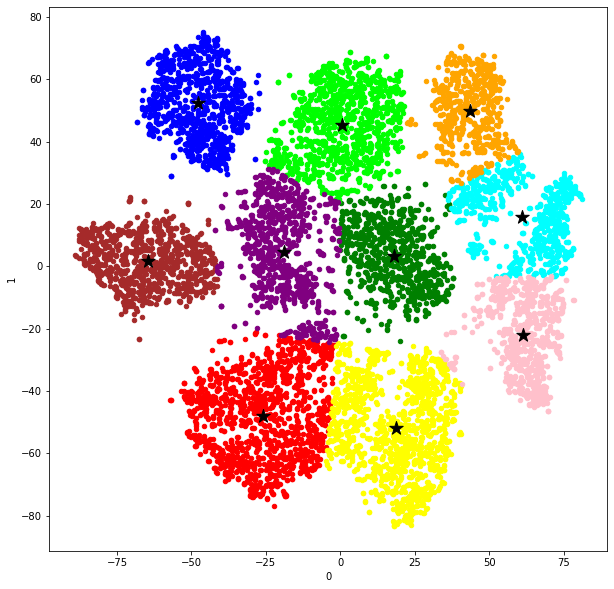

In [11]:
fig=data[asgn==0].plot(kind='scatter',figsize=(10, 10),x=0,y=1,color='red')
data[asgn==1].plot(kind='scatter',x=0,y=1,color='green',ax=fig)
data[asgn==2].plot(kind='scatter',x=0,y=1,color='blue',ax=fig)
data[asgn==3].plot(kind='scatter',x=0,y=1,color='brown',ax=fig)
data[asgn==4].plot(kind='scatter',x=0,y=1,color='lime',ax=fig)
data[asgn==5].plot(kind='scatter',x=0,y=1,color='yellow',ax=fig)
data[asgn==6].plot(kind='scatter',x=0,y=1,color='cyan',ax=fig)
data[asgn==7].plot(kind='scatter',x=0,y=1,color='orange',ax=fig)
data[asgn==8].plot(kind='scatter',x=0,y=1,color='pink',ax=fig)
data[asgn==9].plot(kind='scatter',x=0,y=1,color='purple',ax=fig)
cen.plot(kind='scatter',marker='*',s=200,x=0,y=1,color='black',ax=fig)

In [ ]:
pd.DataFrame(asgn).to_csv(path_or_buf='C:\\\\Users\\\\Pratik\\\\Desktop\\\\submission.txt',header=False,index=False,index_label=None,mode='w')